In [4]:
from dotenv import load_dotenv
load_dotenv()
from langchain.chat_models import init_chat_model

model = init_chat_model(
    model="llama-3.1-8b-instant",
    model_provider="groq"
)


In [14]:
from typing_extensions import TypedDict
from typing import Annotated,List
from langgraph.graph import add_messages

class State(TypedDict):
    messages:Annotated[list,add_messages]

In [13]:
def superbot(state:State):
    print("Superbot node has been Called")
    return {"messages":[model.invoke(state["messages"])]}

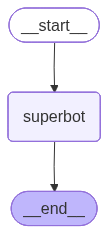

In [16]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

## Define the Graph
graph = StateGraph(State)

## Define the nodes
graph.add_node("superbot",superbot)

## Define the edges
graph.add_edge(START,"superbot")
graph.add_edge("superbot",END)

## Compile the Graph
graph_builder = graph.compile()

# Draw the Graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [19]:
response = graph_builder.invoke({"messages":"What is Artificial Intelligence"})
response

Superbot node has been Called


{'messages': [HumanMessage(content='What is Artificial Intelligence', additional_kwargs={}, response_metadata={}, id='07ef16a8-fd41-4ee7-b178-509c9bde7393'),
  AIMessage(content='Artificial Intelligence (AI) refers to the development of computer systems that can perform tasks that typically require human intelligence, such as:\n\n1. **Learning**: AI systems can learn from data, experience, and feedback, allowing them to improve their performance over time.\n2. **Reasoning**: AI systems can draw inferences, make decisions, and solve problems using logic, rules, and probability.\n3. **Perception**: AI systems can interpret and understand data from sensors, such as images, speech, and text.\n4. **Language understanding**: AI systems can comprehend and generate human language, including speech and text.\n\nAI can be categorized into several types:\n\n1. **Narrow or Weak AI**: Designed to perform a specific task, such as playing chess, recognizing faces, or translating languages.\n2. **Gene

In [20]:
from pprint import pprint
for event in graph_builder.stream({"messages":"What is Artificial Intelligence"}):
    print(event)
    



Superbot node has been Called
{'superbot': {'messages': [AIMessage(content='Artificial Intelligence (AI) is a broad field of computer science that focuses on creating intelligent machines that can perform tasks that typically require human intelligence. This includes learning, problem-solving, decision-making, perception, and language understanding.\n\nAI systems are designed to simulate human-like intelligence, but they are not conscious or sentient in the way humans are. Instead, they use complex algorithms and data to make predictions, classify objects, and make decisions.\n\nThere are several types of AI, including:\n\n1. **Narrow or Weak AI**: This type of AI is designed to perform a specific task, such as facial recognition, language translation, or playing chess. Narrow AI is trained on a specific dataset and is not capable of general reasoning or problem-solving.\n2. **General or Strong AI**: This type of AI is designed to perform any intellectual task that a human can, such as